In [47]:
import praw
import pandas as pd
import time
from nltk.corpus import stopwords

In [16]:
from datetime import datetime
from datetime import timezone
dt_2020 = datetime(2020, 4, 21)
ts_2020 = dt_2020.replace(tzinfo=timezone.utc).timestamp()
print(ts_2020)

dt_2021 = datetime(2021, 4, 21)
ts_2021 = dt_2021.replace(tzinfo=timezone.utc).timestamp()
print(ts_2021)

1587427200.0
1618963200.0


In [22]:
reddit = praw.Reddit(client_id='nfgFdWocI1GFIQ',
                    client_secret='z_rsAXFyjZ3fELcJKucmHsQIB3jgHQ',
                    password='447account',
                    user_agent='447 Example',
                    username='Traditional-Ad-9640')
news = reddit.subreddit('News')


yesterdays_news = news.random()

topics_dict={"title":[],\
                "score":[],\
                "id":[],\
                "url":[],\
                "coms_num":[],\
                "author":[],\
                "upvotes":[],\
                }
x = 0

while x < 1500:
    x+=1
    time.sleep(.5)
    post = news.random()
    if isinstance(post, praw.models.reddit.submission.Submission) and post.created_utc > 1618963200:
        topics_dict["title"].append(post.title)
        topics_dict["score"].append(post.score)
        topics_dict["id"].append(post.id)
        topics_dict["url"].append(post.url)
        topics_dict["coms_num"].append(post.num_comments)
        topics_dict["author"].append(post.author)
        topics_dict["upvotes"].append(post.ups)

US_news_df = pd.DataFrame(data=topics_dict)
US_news_df

,title,score,id,url,coms_num,author,upvotes
0,St. Paul ‘sovereign citizen’ records himself s...,1764,naxke1,https://minnesotareformer.com/2021/05/08/st-pa...,219,zardogo,1764
1,District keeps kids at home because of lack of...,73,naywl0,https://apnews.com/article/coronavirus-pandemi...,3,brashendeavors,73
2,Tacoma man says he was stabbed after asking so...,2660,nab3az,https://www.kiro7.com/news/local/tacoma-man-sa...,599,DICK-FUCK-PUSSY-SUCK,2660
3,Israeli air strike destroys Gaza tower block,342,na47s3,https://www.aljazeera.com/news/2021/5/11/israe...,285,throwaway0152384,342
4,Elon Musk says Tesla will stop accepting bitco...,4068,nb17cy,https://www.cnbc.com/2021/05/12/elon-musk-says...,860,FletchForPresident,4068
...,...,...,...,...,...,...,...
1495,Chicago gun pipeline traced to three Fort Camp...,3858,naex5y,https://www.armytimes.com/news/your-army/2021/...,829,throwaway0152384,3858
1496,Gas stations run dry as cyberattack paralyzes ...,655,na08mo,https://financialpost.com/commodities/energy/o...,290,TheColorOfDeadMen,655
1497,University of Michigan officials didn't act on...,1099,nawgp1,https://www.cnn.com/2021/05/12/us/umichigan-in...,49,JRWoodwardMSW,1099
1498,Gay Iranian man dead in alleged ‘honor killing...,171,nalkco,https://www.nbcnews.com/feature/nbc-out/gay-ir...,25,sh0tgunben,171


In [25]:
US_news_df.to_csv("US2021.csv")

In [48]:
import csv
US_news_df_copy = pd.read_csv('US2021.csv')

In [49]:
# df['title']=df['title'].str.replace('[^A-Za-z0-9 ]','',regex=True)
US_news_df_copy['word_count'] = US_news_df_copy['title'].apply(lambda x: len(str(x).split(" ")))
US_news_df_copy

,Unnamed: 0,title,score,id,url,coms_num,author,upvotes,word_count
0,0,St. Paul ‘sovereign citizen’ records himself s...,1764,naxke1,https://minnesotareformer.com/2021/05/08/st-pa...,219,zardogo,1764,10
1,1,District keeps kids at home because of lack of...,73,naywl0,https://apnews.com/article/coronavirus-pandemi...,3,brashendeavors,73,11
2,2,Tacoma man says he was stabbed after asking so...,2660,nab3az,https://www.kiro7.com/news/local/tacoma-man-sa...,599,DICK-FUCK-PUSSY-SUCK,2660,13
3,3,Israeli air strike destroys Gaza tower block,342,na47s3,https://www.aljazeera.com/news/2021/5/11/israe...,285,throwaway0152384,342,7
4,4,Elon Musk says Tesla will stop accepting bitco...,4068,nb17cy,https://www.cnbc.com/2021/05/12/elon-musk-says...,860,FletchForPresident,4068,14
...,...,...,...,...,...,...,...,...,...
1495,1495,Chicago gun pipeline traced to three Fort Camp...,3858,naex5y,https://www.armytimes.com/news/your-army/2021/...,829,throwaway0152384,3858,9
1496,1496,Gas stations run dry as cyberattack paralyzes ...,655,na08mo,https://financialpost.com/commodities/energy/o...,290,TheColorOfDeadMen,655,14
1497,1497,University of Michigan officials didn't act on...,1099,nawgp1,https://www.cnn.com/2021/05/12/us/umichigan-in...,49,JRWoodwardMSW,1099,19
1498,1498,Gay Iranian man dead in alleged ‘honor killing...,171,nalkco,https://www.nbcnews.com/feature/nbc-out/gay-ir...,25,sh0tgunben,171,11


In [32]:
US_news_df_copy['title']=US_news_df_copy['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
US_news_df_copy

,Unnamed: 0,title,score,id,url,coms_num,author,upvotes,word_count
0,0,st. paul ‘sovereign citizen’ records himself s...,1764,naxke1,https://minnesotareformer.com/2021/05/08/st-pa...,219,zardogo,1764,10
1,1,district keeps kids at home because of lack of...,73,naywl0,https://apnews.com/article/coronavirus-pandemi...,3,brashendeavors,73,11
2,2,tacoma man says he was stabbed after asking so...,2660,nab3az,https://www.kiro7.com/news/local/tacoma-man-sa...,599,DICK-FUCK-PUSSY-SUCK,2660,13
3,3,israeli air strike destroys gaza tower block,342,na47s3,https://www.aljazeera.com/news/2021/5/11/israe...,285,throwaway0152384,342,7
4,4,elon musk says tesla will stop accepting bitco...,4068,nb17cy,https://www.cnbc.com/2021/05/12/elon-musk-says...,860,FletchForPresident,4068,14
...,...,...,...,...,...,...,...,...,...
1495,1495,chicago gun pipeline traced to three fort camp...,3858,naex5y,https://www.armytimes.com/news/your-army/2021/...,829,throwaway0152384,3858,9
1496,1496,gas stations run dry as cyberattack paralyzes ...,655,na08mo,https://financialpost.com/commodities/energy/o...,290,TheColorOfDeadMen,655,14
1497,1497,university of michigan officials didn't act on...,1099,nawgp1,https://www.cnn.com/2021/05/12/us/umichigan-in...,49,JRWoodwardMSW,1099,19
1498,1498,gay iranian man dead in alleged ‘honor killing...,171,nalkco,https://www.nbcnews.com/feature/nbc-out/gay-ir...,25,sh0tgunben,171,11


In [50]:
stop = stopwords.words('english')
US_news_df_copy['title'] = US_news_df_copy['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
US_news_df_copy

,Unnamed: 0,title,score,id,url,coms_num,author,upvotes,word_count
0,0,St. Paul ‘sovereign citizen’ records stealing ...,1764,naxke1,https://minnesotareformer.com/2021/05/08/st-pa...,219,zardogo,1764,10
1,1,District keeps kids home lack bus drivers,73,naywl0,https://apnews.com/article/coronavirus-pandemi...,3,brashendeavors,73,11
2,2,Tacoma man says stabbed asking someone wear mask,2660,nab3az,https://www.kiro7.com/news/local/tacoma-man-sa...,599,DICK-FUCK-PUSSY-SUCK,2660,13
3,3,Israeli air strike destroys Gaza tower block,342,na47s3,https://www.aljazeera.com/news/2021/5/11/israe...,285,throwaway0152384,342,7
4,4,Elon Musk says Tesla stop accepting bitcoin ca...,4068,nb17cy,https://www.cnbc.com/2021/05/12/elon-musk-says...,860,FletchForPresident,4068,14
...,...,...,...,...,...,...,...,...,...
1495,1495,Chicago gun pipeline traced three Fort Campbel...,3858,naex5y,https://www.armytimes.com/news/your-army/2021/...,829,throwaway0152384,3858,9
1496,1496,Gas stations run dry cyberattack paralyzes Ame...,655,na08mo,https://financialpost.com/commodities/energy/o...,290,TheColorOfDeadMen,655,14
1497,1497,University Michigan officials act reports sexu...,1099,nawgp1,https://www.cnn.com/2021/05/12/us/umichigan-in...,49,JRWoodwardMSW,1099,19
1498,1498,"Gay Iranian man dead alleged ‘honor killing,’ ...",171,nalkco,https://www.nbcnews.com/feature/nbc-out/gay-ir...,25,sh0tgunben,171,11


In [52]:
US_news_df_copy.to_csv("cleaned_US2021.csv")

In [34]:
sorted = US_news_df_copy.sort_values(by=['upvotes'], ascending=False)
new_df = sorted.drop_duplicates(subset=['title'])
US_top_30 = new_df.head(30)
US_top_30

,Unnamed: 0,title,score,id,url,coms_num,author,upvotes,word_count
135,135,40 attorneys general urge facebook stop plans ...,73595,n9exq0,https://www.cnn.com/2021/05/10/tech/facebook-i...,2813,Illustrious_Welder94,73595,15
19,19,1 million people sign affordable care act cove...,72624,n9wtwd,https://www.cnn.com/2021/05/11/politics/afford...,4164,StatistUnion,72624,14
798,798,national rifle association cannot use bankrupt...,62254,na5ojz,https://news.trust.org/item/20210511181533-nqv5i/,2410,Illustrious_Welder94,62254,41
1454,1454,‘do fill plastic bags gasoline’ u.s. warns sho...,43757,naxih6,https://www.reuters.com/business/energy/do-not...,4293,AgainstSomeLogic,43757,12
1077,1077,goldman sachs executive quits making millions ...,42776,naftyt,https://www.theguardian.com/technology/2021/ma...,3561,getBusyChild,42776,9
1340,1340,inflation surges april consumer prices leap 4....,39730,nanzn9,https://www.cnbc.com/2021/05/12/consumer-price...,7605,Sharper133,39730,12
1434,1434,minnesota judge ruled aggravating factors deat...,36151,napgk2,https://apnews.com/article/george-floyd-death-...,1562,Illustrious_Welder94,36151,32
1191,1191,u.s. official says covid booster shots also fr...,22416,na0w1e,https://www.cnbc.com/2021/05/11/us-official-sa...,1274,Hillick,22416,13
1482,1482,"brett favre owes mississippi $600,000 speaking...",10145,natg42,https://www.nbcnews.com/news/us-news/brett-fav...,405,Bream1000,10145,15
1363,1363,chemical giants hid dangers ‘forever chemicals...,9219,napsjj,https://www.theguardian.com/environment/2021/m...,631,LateCheckIn,9219,10


In [36]:
corpus = ' '.join(US_top_30['title'])
corp = open("news_words.txt","w")
corp.writelines(corpus)
corp.close()

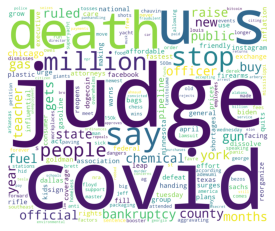

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

file_content=open("news_words.txt").read()

wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
reddit = praw.Reddit(client_id='pUBdCmRMoXbboA',
                        client_secret='dbY5VCYAyuno7ch7S0TeAmUPdBtMYA',
                        user_agent='INST447',
                        username='Fit_Veterinarian_651')
 
world_news = reddit.subreddit('worldnews')


elements_dict = {"title":[],\
                "score":[],\
                "id":[],\
                "url":[],\
                "coms_num":[],\
                "author":[],\
                "upvotes":[],\
               }

x = 0

while x < 1500:
    x+=1
    time.sleep(.5)
    post = world_news.random()
    if isinstance(post, praw.models.reddit.submission.Submission) and post.created_utc > 1618963200:
        elements_dict["title"].append(post.title)
        elements_dict["score"].append(post.score)
        elements_dict["id"].append(post.id)
        elements_dict["url"].append(post.url)
        elements_dict["coms_num"].append(post.url)
        elements_dict["author"].append(post.author)
        elements_dict["upvotes"].append(post.ups)
        
WN_df = pd.DataFrame(data=elements_dict)
WN_df

,title,score,id,url,coms_num,author,upvotes
0,Bosnian Serb ex-leader Karadzic to serve genoc...,44,naup26,https://www.aljazeera.com/news/2021/5/12/bosni...,https://www.aljazeera.com/news/2021/5/12/bosni...,vokiel,44
1,Taiwan computer brand wiped from mainland Chin...,32,nb3z2v,https://www.scmp.com/tech/tech-trends/article/...,https://www.scmp.com/tech/tech-trends/article/...,ccpshrilldetective,32
2,"""A Hell Out Here"": COVID-19 Ravages Rural India",11,nbcuse,https://www.ndtv.com/india-news/a-hell-out-her...,https://www.ndtv.com/india-news/a-hell-out-her...,Revolutionary_Ant852,11
3,Federal budget 2021: Foreign aid cut against n...,3,nbafrh,https://www.news.com.au/finance/economy/federa...,https://www.news.com.au/finance/economy/federa...,kamikkazet,3
4,Weary Gaza marks Muslim feast as violence spre...,17,nbdzub,https://apnews.com/article/middle-east-israel-...,https://apnews.com/article/middle-east-israel-...,GDW312,17
...,...,...,...,...,...,...,...
1492,Elisabetta Belloni: Italy appoints first femal...,16,nbfyxj,https://www.bbc.com/news/world-europe-57099284,https://www.bbc.com/news/world-europe-57099284,temporarycreature,16
1493,"When it comes to hobbies and side hustles, the...",16,nbd6du,https://www.ctvnews.ca/business/pattie-lovett-...,https://www.ctvnews.ca/business/pattie-lovett-...,Syberz,16
1494,British troops were twice as likely to be kill...,141,nakj7n,https://www.theguardian.com/world/2021/may/12/...,https://www.theguardian.com/world/2021/may/12/...,billypilgrim87,141
1495,Erdogan Calls French Separatism Bill ‘Guilloti...,10,nbhk9d,https://www.courthousenews.com/erdogan-calls-f...,https://www.courthousenews.com/erdogan-calls-f...,EdHake,10


In [26]:
WN_df.to_csv("World2021.csv")

In [53]:
WN_df_copy = pd.read_csv('World2021.csv')

In [54]:
WN_df_copy['word_count'] = WN_df_copy['title'].apply(lambda x: len(str(x).split(' ')))
WN_df_copy

,Unnamed: 0,title,score,id,url,coms_num,author,upvotes,word_count
0,0,Bosnian Serb ex-leader Karadzic to serve genoc...,44,naup26,https://www.aljazeera.com/news/2021/5/12/bosni...,https://www.aljazeera.com/news/2021/5/12/bosni...,vokiel,44,11
1,1,Taiwan computer brand wiped from mainland Chin...,32,nb3z2v,https://www.scmp.com/tech/tech-trends/article/...,https://www.scmp.com/tech/tech-trends/article/...,ccpshrilldetective,32,11
2,2,"""A Hell Out Here"": COVID-19 Ravages Rural India",11,nbcuse,https://www.ndtv.com/india-news/a-hell-out-her...,https://www.ndtv.com/india-news/a-hell-out-her...,Revolutionary_Ant852,11,8
3,3,Federal budget 2021: Foreign aid cut against n...,3,nbafrh,https://www.news.com.au/finance/economy/federa...,https://www.news.com.au/finance/economy/federa...,kamikkazet,3,13
4,4,Weary Gaza marks Muslim feast as violence spre...,17,nbdzub,https://apnews.com/article/middle-east-israel-...,https://apnews.com/article/middle-east-israel-...,GDW312,17,10
...,...,...,...,...,...,...,...,...,...
1492,1492,Elisabetta Belloni: Italy appoints first femal...,16,nbfyxj,https://www.bbc.com/news/world-europe-57099284,https://www.bbc.com/news/world-europe-57099284,temporarycreature,16,8
1493,1493,"When it comes to hobbies and side hustles, the...",16,nbd6du,https://www.ctvnews.ca/business/pattie-lovett-...,https://www.ctvnews.ca/business/pattie-lovett-...,Syberz,16,14
1494,1494,British troops were twice as likely to be kill...,141,nakj7n,https://www.theguardian.com/world/2021/may/12/...,https://www.theguardian.com/world/2021/may/12/...,billypilgrim87,141,14
1495,1495,Erdogan Calls French Separatism Bill ‘Guilloti...,10,nbhk9d,https://www.courthousenews.com/erdogan-calls-f...,https://www.courthousenews.com/erdogan-calls-f...,EdHake,10,8


In [40]:
WN_df_copy['title'] = WN_df_copy['title'].apply(lambda x:' '.join(x.lower() for x in x.split()))
WN_df_copy

,Unnamed: 0,title,score,id,url,coms_num,author,upvotes,word_count
0,0,bosnian serb ex-leader karadzic to serve genoc...,44,naup26,https://www.aljazeera.com/news/2021/5/12/bosni...,https://www.aljazeera.com/news/2021/5/12/bosni...,vokiel,44,11
1,1,taiwan computer brand wiped from mainland chin...,32,nb3z2v,https://www.scmp.com/tech/tech-trends/article/...,https://www.scmp.com/tech/tech-trends/article/...,ccpshrilldetective,32,11
2,2,"""a hell out here"": covid-19 ravages rural india",11,nbcuse,https://www.ndtv.com/india-news/a-hell-out-her...,https://www.ndtv.com/india-news/a-hell-out-her...,Revolutionary_Ant852,11,8
3,3,federal budget 2021: foreign aid cut against n...,3,nbafrh,https://www.news.com.au/finance/economy/federa...,https://www.news.com.au/finance/economy/federa...,kamikkazet,3,13
4,4,weary gaza marks muslim feast as violence spre...,17,nbdzub,https://apnews.com/article/middle-east-israel-...,https://apnews.com/article/middle-east-israel-...,GDW312,17,10
...,...,...,...,...,...,...,...,...,...
1492,1492,elisabetta belloni: italy appoints first femal...,16,nbfyxj,https://www.bbc.com/news/world-europe-57099284,https://www.bbc.com/news/world-europe-57099284,temporarycreature,16,8
1493,1493,"when it comes to hobbies and side hustles, the...",16,nbd6du,https://www.ctvnews.ca/business/pattie-lovett-...,https://www.ctvnews.ca/business/pattie-lovett-...,Syberz,16,14
1494,1494,british troops were twice as likely to be kill...,141,nakj7n,https://www.theguardian.com/world/2021/may/12/...,https://www.theguardian.com/world/2021/may/12/...,billypilgrim87,141,14
1495,1495,erdogan calls french separatism bill ‘guilloti...,10,nbhk9d,https://www.courthousenews.com/erdogan-calls-f...,https://www.courthousenews.com/erdogan-calls-f...,EdHake,10,8


In [55]:
stop = stopwords.words('english')
WN_df_copy['title'] = WN_df_copy['title'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
WN_df_copy

,Unnamed: 0,title,score,id,url,coms_num,author,upvotes,word_count
0,0,Bosnian Serb ex-leader Karadzic serve genocide...,44,naup26,https://www.aljazeera.com/news/2021/5/12/bosni...,https://www.aljazeera.com/news/2021/5/12/bosni...,vokiel,44,11
1,1,Taiwan computer brand wiped mainland China’s o...,32,nb3z2v,https://www.scmp.com/tech/tech-trends/article/...,https://www.scmp.com/tech/tech-trends/article/...,ccpshrilldetective,32,11
2,2,"""A Hell Out Here"": COVID-19 Ravages Rural India",11,nbcuse,https://www.ndtv.com/india-news/a-hell-out-her...,https://www.ndtv.com/india-news/a-hell-out-her...,Revolutionary_Ant852,11,8
3,3,Federal budget 2021: Foreign aid cut national ...,3,nbafrh,https://www.news.com.au/finance/economy/federa...,https://www.news.com.au/finance/economy/federa...,kamikkazet,3,13
4,4,Weary Gaza marks Muslim feast violence spreads...,17,nbdzub,https://apnews.com/article/middle-east-israel-...,https://apnews.com/article/middle-east-israel-...,GDW312,17,10
...,...,...,...,...,...,...,...,...,...
1492,1492,Elisabetta Belloni: Italy appoints first femal...,16,nbfyxj,https://www.bbc.com/news/world-europe-57099284,https://www.bbc.com/news/world-europe-57099284,temporarycreature,16,8
1493,1493,"When comes hobbies side hustles, Canadian Reve...",16,nbd6du,https://www.ctvnews.ca/business/pattie-lovett-...,https://www.ctvnews.ca/business/pattie-lovett-...,Syberz,16,14
1494,1494,British troops twice likely killed Afghanistan...,141,nakj7n,https://www.theguardian.com/world/2021/may/12/...,https://www.theguardian.com/world/2021/may/12/...,billypilgrim87,141,14
1495,1495,Erdogan Calls French Separatism Bill ‘Guilloti...,10,nbhk9d,https://www.courthousenews.com/erdogan-calls-f...,https://www.courthousenews.com/erdogan-calls-f...,EdHake,10,8


In [43]:
sorting_vote = WN_df_copy.sort_values(by=['upvotes'], ascending=False)
sorted_WN_df = sorting_vote.drop_duplicates(subset=['title'])
WN_top_30 = sorted_WN_df.head(30)
WN_top_30

,Unnamed: 0,title,score,id,url,coms_num,author,upvotes,word_count
808,808,indian government says 5g doesn’t cause covid-...,45163,n9xra8,https://www.theregister.com/2021/05/11/india_5...,https://www.theregister.com/2021/05/11/india_5...,Kuchbhilikhlo,45163,15
889,889,animals to be formally recognised as sentient ...,44348,nahbnf,https://www.theguardian.com/world/2021/may/12/...,https://www.theguardian.com/world/2021/may/12/...,Illustrious_Welder94,44348,11
1307,1307,"""2 for 100, 3 for 75."" - israeli soldier posts...",35619,nbcwlv,https://www.dailydot.com/debug/israel-soldier-...,https://www.dailydot.com/debug/israel-soldier-...,Dark-X,35619,23
449,449,israel rejects hamas truce offer; ministers vo...,31345,nb2e4n,https://www.ynetnews.com/article/ryHhosK00u,https://www.ynetnews.com/article/ryHhosK00u,Somizulfi,31345,11
1290,1290,'we're watching a lynching': jewish crowd in i...,25192,naz4ih,https://www.jta.org/2021/05/12/israel/were-wat...,https://www.jta.org/2021/05/12/israel/were-wat...,ManOfInfiniteJest,25192,20
462,462,us officials believe russia may be behind the ...,17570,na2t3u,https://www.businessinsider.com/directed-energ...,https://www.businessinsider.com/directed-energ...,Speedster202,17570,22
372,372,israel calls on biden administration to stay o...,15512,nabees,https://news.yahoo.com/amphtml/israel-calls-bi...,https://news.yahoo.com/amphtml/israel-calls-bi...,gerundwizard,15512,11
922,922,b.c. to refuse driver’s licence renewals to pe...,11700,nb7cnk,https://globalnews.ca/news/7856554/bc-licence-...,https://globalnews.ca/news/7856554/bc-licence-...,princey12,11700,12
1327,1327,israeli flags burned outside 2 german synagogu...,11129,naq5x7,https://www.jta.org/quick-reads/israeli-flags-...,https://www.jta.org/quick-reads/israeli-flags-...,Mdk_251,11129,14
476,476,ethereum creator vitalik buterin donates $1 bi...,9902,naxzrd,https://cryptoslate.com/vitalik-buterin-1-bill...,https://cryptoslate.com/vitalik-buterin-1-bill...,grittygatorr,9902,11


In [56]:
WN_df_copy.to_csv("cleaned_WN2021.csv")

In [44]:
corpus = ' '.join(WN_top_30['title'])
corp = open("worldNews_words.txt", "w")
corp.writelines(corpus)
corp.close()

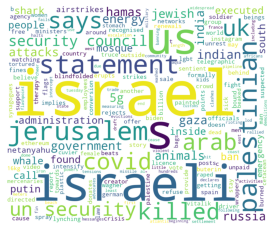

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

WNtxt_content = open("worldNews_words.txt").read()

wordcloud = WordCloud(stopwords = STOPWORDS, 
                     background_color = 'white',
                     width = 1200,
                     height = 1000).generate(WNtxt_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [58]:
from collections import Counter
def word_count(fname):
        with open(fname) as f:
                return Counter(f.read().split())

print("Number of words in the file :",word_count("cleaned_US2021.csv"))

UnicodeDecodeError: 'cp932' codec can't decode byte 0x98 in position 82: illegal multibyte sequence

In [14]:
print("Number of words in the file :",word_count("news_words.txt"))

Number of words in the file : Counter({'police': 5, 'arrested': 4, 'city': 2, 'officer': 2, 'russia': 2, 'woman': 2, 'back': 2, 'man': 2, 'home': 2, 'accused': 2, 'body': 2, 'video': 2, 'teen': 2, 'covid19': 2, 'vaccinations': 2, 'us': 2, 'oklahoma': 2, 'remains': 2, 'virginia': 1, 'fires': 1, 'kyle': 1, 'rittenhouse': 1, 'donation': 1, 'withdraw': 1, 'troops': 1, 'ukraine': 1, 'border': 1, 'finds': 1, 'tracking': 1, 'device': 1, 'car': 1, 'louisiana': 1, 'state': 1, 'wants': 1, 'hit': 1, '4000': 1, 'bill': 1, 'yearlong': 1, 'jail': 1, 'stay': 1, 'charges': 1, 'later': 1, 'dismissed': 1, 'derek': 1, 'chauvin': 1, 'held': 1, 'solitary': 1, 'confinement': 1, '23': 1, 'hours': 1, 'day': 1, 'scientific': 1, 'paper': 1, 'claiming': 1, 'smokers': 1, 'less': 1, 'likely': 1, 'acquire': 1, 'covid': 1, 'retracted': 1, 'tobacco': 1, 'industry': 1, 'links': 1, 'spain': 1, 'give': 1, 'pets': 1, 'rights': 1, 'humans': 1, 'breakthrough': 1, 'bullfighting': 1, 'neonazi': 1, 'leader': 1, 'arizona': 1, 

In [16]:
df.shape()

NameError: name 'df' is not defined

In [15]:
test_df.shape

(1500, 8)